# Taking Data and cleaning it

In [2]:
from audioop import ratecv
import pandas as pd
import numpy as np
df_movies = pd.read_csv("movies.csv" , usecols= ["movieId" , "title"] , dtype = {"movieId" : "int32" , "title" : "str"})
df_ratings = pd.read_csv("ratings.csv" , usecols= ["userId" , "movieId" , "rating"] , dtype = {"userId" : "int32" , "movieId" : "int32" , "rating" : "float32"})


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_23284\16469036.py:1: DeprecationWarning: 'audioop' is deprecated and slated for removal in Python 3.13
  from audioop import ratecv


# Initial EDA

In [3]:
df_movies

,movieId,title
0,1,Toy Story (1995)
1,2,Jumanji (1995)
2,3,Grumpier Old Men (1995)
3,4,Waiting to Exhale (1995)
4,5,Father of the Bride Part II (1995)
...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017)
9738,193583,No Game No Life: Zero (2017)
9739,193585,Flint (2017)
9740,193587,Bungo Stray Dogs: Dead Apple (2018)


In [4]:
df_ratings

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0
...,...,...,...
100831,610,166534,4.0
100832,610,168248,5.0
100833,610,168250,5.0
100834,610,168252,5.0


In [5]:
df_movies.isnull().sum()


movieId    0
title      0
dtype: int64

In [6]:
df_ratings.isnull().sum()
# no missing data

userId     0
movieId    0
rating     0
dtype: int64

In [7]:
df_ratings.describe()

,userId,movieId,rating
count,100836.000000,100836.000000,100836.000000
mean,326.127564,19435.295718,3.501557
std,182.618491,35530.987199,1.042529
min,1.000000,1.000000,0.500000
25%,177.000000,1199.000000,3.000000
50%,325.000000,2991.000000,3.500000
75%,477.000000,8122.000000,4.000000
max,610.000000,193609.000000,5.000000


# Making the Data into one dataframe for easier reading 

In [8]:
# making my life easier with merging the important columns together
df_merged_data = pd.merge(df_ratings,df_movies ,on = "movieId")
df_merged_data

,userId,movieId,rating,title
0,1,1,4.0,Toy Story (1995)
1,1,3,4.0,Grumpier Old Men (1995)
2,1,6,4.0,Heat (1995)
3,1,47,5.0,Seven (a.k.a. Se7en) (1995)
4,1,50,5.0,"Usual Suspects, The (1995)"
...,...,...,...,...
100831,610,166534,4.0,Split (2017)
100832,610,168248,5.0,John Wick: Chapter Two (2017)
100833,610,168250,5.0,Get Out (2017)
100834,610,168252,5.0,Logan (2017)


# 1.2 Filtering the dataframe + EDA(I'm checking the dataframe's description in a plot)


In [9]:
import re
from requests import head

combine_movie_rating = df_merged_data.dropna(axis=0, subset=['title', 'rating'])
rating_count = combine_movie_rating.groupby(by="title")["rating"].count().reset_index().rename(columns={'rating': 'rating_count'})
pattern = r'\((\d+)\)' # I'm taking the year part of every title and putting it in its own column for better reading afters and clean data structure
df_years = rating_count['title'].str.extract(pattern) #extract the pattern(i searched for this code i don't know how to extract pattern strings)
rating_count['year'] = df_years.astype(float) # didn't have a choice i needed to put it as float so it has an ugly 0 at the end
rating_with_totalRatingCount = combine_movie_rating.merge(rating_count, on='title', how='left')
rating_with_totalRatingCount

,userId,movieId,rating,title,rating_count,year
0,1,1,4.0,Toy Story (1995),215,1995.0
1,1,3,4.0,Grumpier Old Men (1995),52,1995.0
2,1,6,4.0,Heat (1995),102,1995.0
3,1,47,5.0,Seven (a.k.a. Se7en) (1995),203,1995.0
4,1,50,5.0,"Usual Suspects, The (1995)",204,1995.0
...,...,...,...,...,...,...
100831,610,166534,4.0,Split (2017),6,2017.0
100832,610,168248,5.0,John Wick: Chapter Two (2017),7,2017.0
100833,610,168250,5.0,Get Out (2017),15,2017.0
100834,610,168252,5.0,Logan (2017),25,2017.0


# Plot to see the description of the newly merged dataset (EDA)

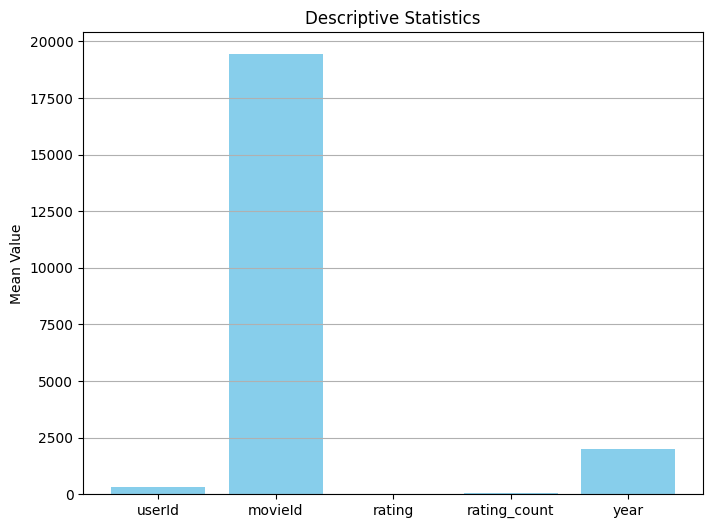

In [23]:
summary_stats = rating_with_totalRatingCount.describe()
import matplotlib.pyplot as plt
# Create a bar plot for the summary statistics
plt.figure(figsize=(8, 6))
plt.bar(summary_stats.columns, summary_stats.loc['mean'], color='skyblue')
plt.title('Descriptive Statistics')
plt.ylabel('Mean Value')
plt.grid(axis='y')
plt.show()

In [10]:
rating_with_totalRatingCount.info()
# seeing if this can be plotted or not(had trouble because its huge data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   userId        100836 non-null  int32  
 1   movieId       100836 non-null  int32  
 2   rating        100836 non-null  float32
 3   title         100836 non-null  object 
 4   rating_count  100836 non-null  int64  
 5   year          100818 non-null  float64
dtypes: float32(1), float64(1), int32(2), int64(1), object(1)
memory usage: 3.5+ MB


# The top 10 movies and their respective average ratings / questions(B , C)

In [11]:
# Calculate the average rating for each movie
avg_rating_per_movie = rating_with_totalRatingCount.groupby('movieId')['rating'].mean().reset_index().rename(columns={'rating': 'average_rating'})

# Get the rating count for each movie and sort by the number of ratings
rating_count_sorted = rating_with_totalRatingCount.groupby('movieId')['rating_count'].agg("mean").sort_values(ascending=False).reset_index()

# Merge to add the 'title' and 'average_rating' with the 'rating_count'
rating_count_with_title_avg = rating_count_sorted.merge(
    rating_with_totalRatingCount[['movieId', 'title']].drop_duplicates(), 
    on='movieId', 
    how='left'
).merge(
    avg_rating_per_movie,
    on='movieId',
    how='left'
)

# Remove duplicates (just in case) and get the top 10 most-rated movies
top_10_most_rated_avg = rating_count_with_title_avg.drop_duplicates(subset=['movieId', 'title']).head(10)

# Display the top 10 with title, rating count, and average rating
print(top_10_most_rated_avg[['title', 'rating_count', 'average_rating']])



                                       title  rating_count  average_rating
0                        Forrest Gump (1994)         329.0        4.164134
1           Shawshank Redemption, The (1994)         317.0        4.429022
2                        Pulp Fiction (1994)         307.0        4.197068
3           Silence of the Lambs, The (1991)         279.0        4.161290
4                         Matrix, The (1999)         278.0        4.192446
5  Star Wars: Episode IV - A New Hope (1977)         251.0        4.231076
6                       Jurassic Park (1993)         238.0        3.750000
7                          Braveheart (1995)         237.0        4.031646
8          Terminator 2: Judgment Day (1991)         224.0        3.970982
9                    Schindler's List (1993)         220.0        4.225000


# Plots

# Number of movies released each year

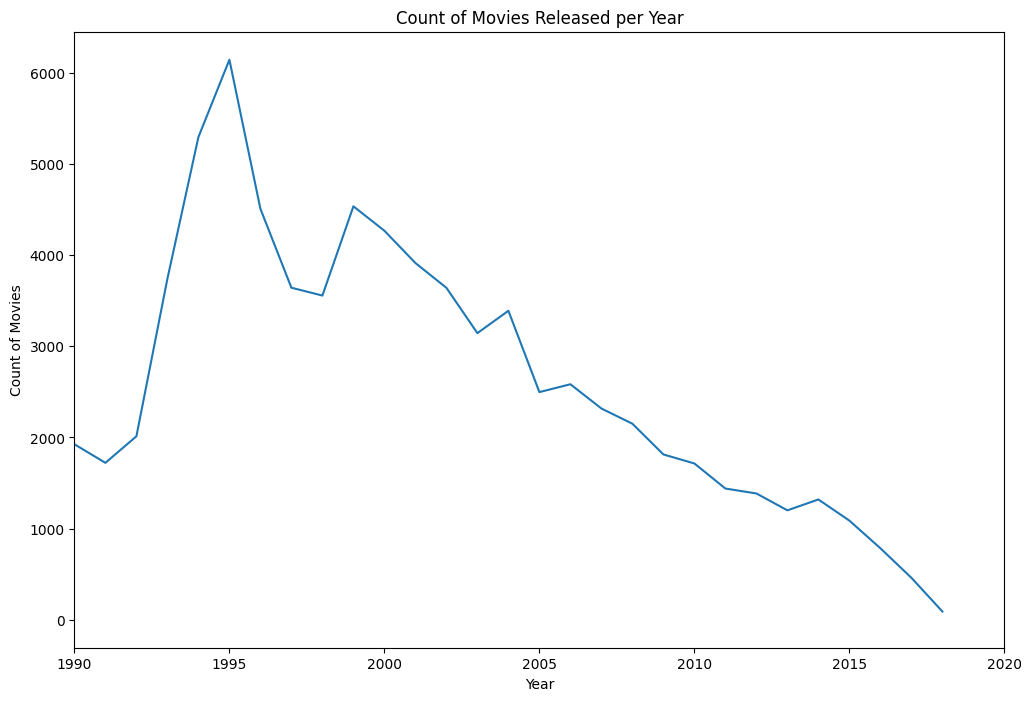

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot(xaxis, yaxis):
    plt.figure(figsize=(12, 8))
    sns.lineplot(x=xaxis, y=yaxis)
    plt.xlabel("Year")
    plt.ylabel("Count of Movies")
    plt.title("Count of Movies Released per Year")
    plt.xlim(1990 , 2020)
    plt.show()

movies_per_year = rating_with_totalRatingCount.groupby('year')['movieId'].count()


plot(movies_per_year.index, movies_per_year.values)




In [13]:
# checking the count of the newly merged df
rating_with_totalRatingCount.describe()

,userId,movieId,rating,rating_count,year
count,100836.000000,100836.000000,100836.000000,100836.000000,100818.000000
mean,326.127564,19435.295718,3.501557,58.758777,1993.796634
std,182.618491,35530.987199,1.042529,61.965384,34.283710
min,1.000000,1.000000,0.500000,1.000000,6.000000
25%,177.000000,1199.000000,3.000000,13.000000,1990.000000
50%,325.000000,2991.000000,3.500000,39.000000,1997.000000
75%,477.000000,8122.000000,4.000000,84.000000,2003.000000
max,610.000000,193609.000000,5.000000,329.000000,2018.000000


# This also comes into play into filtering more lets say useless data because of how unpopular the movies are

In [14]:
# removes the least popular films
popularity_threshold = 50
rating_popular_movie= rating_with_totalRatingCount.query('rating_count >= @popularity_threshold')
rating_popular_movie.head()

,userId,movieId,rating,title,rating_count,year
0,1,1,4.0,Toy Story (1995),215,1995.0
1,1,3,4.0,Grumpier Old Men (1995),52,1995.0
2,1,6,4.0,Heat (1995),102,1995.0
3,1,47,5.0,Seven (a.k.a. Se7en) (1995),203,1995.0
4,1,50,5.0,"Usual Suspects, The (1995)",204,1995.0


In [15]:
rating_popular_movie.shape
# Final Number of filtered data

(41362, 6)

# Number of ratings per movie ID

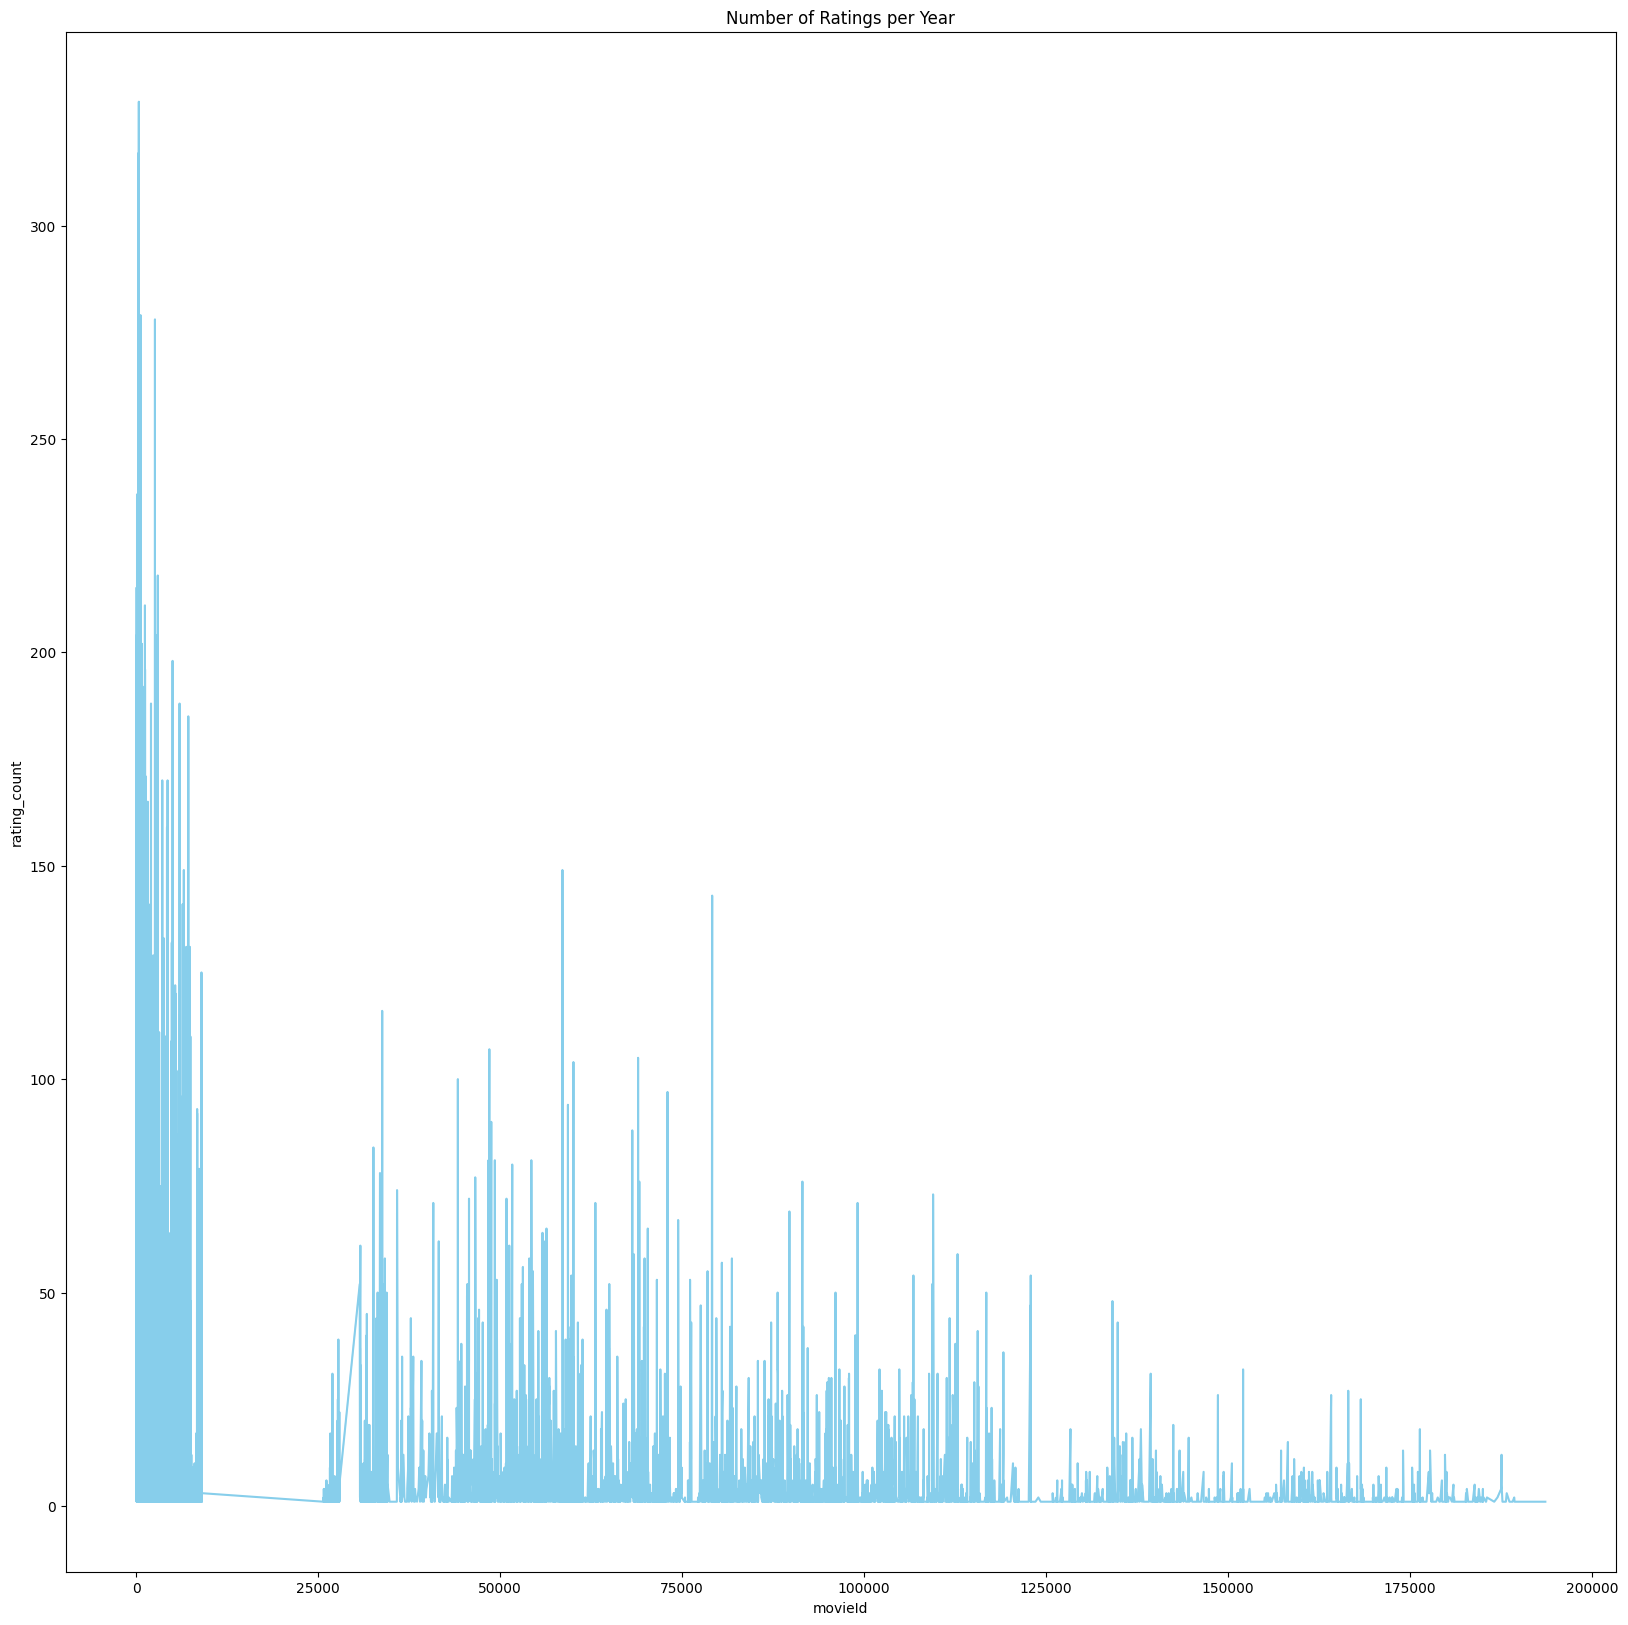

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
def plot_rpy(df, xaxis, yaxis): 
    plt.figure(figsize=(20, 20)) 
    sns.lineplot(x = df[xaxis],y = df[yaxis], color='skyblue') 
    plt.xlabel(xaxis)
    plt.ylabel(yaxis)
    plt.title("Number of Ratings per Year")
    plt.show()
    
plot_rpy(rating_with_totalRatingCount, "movieId", "rating_count")

# Average Rating of the top 10 movies

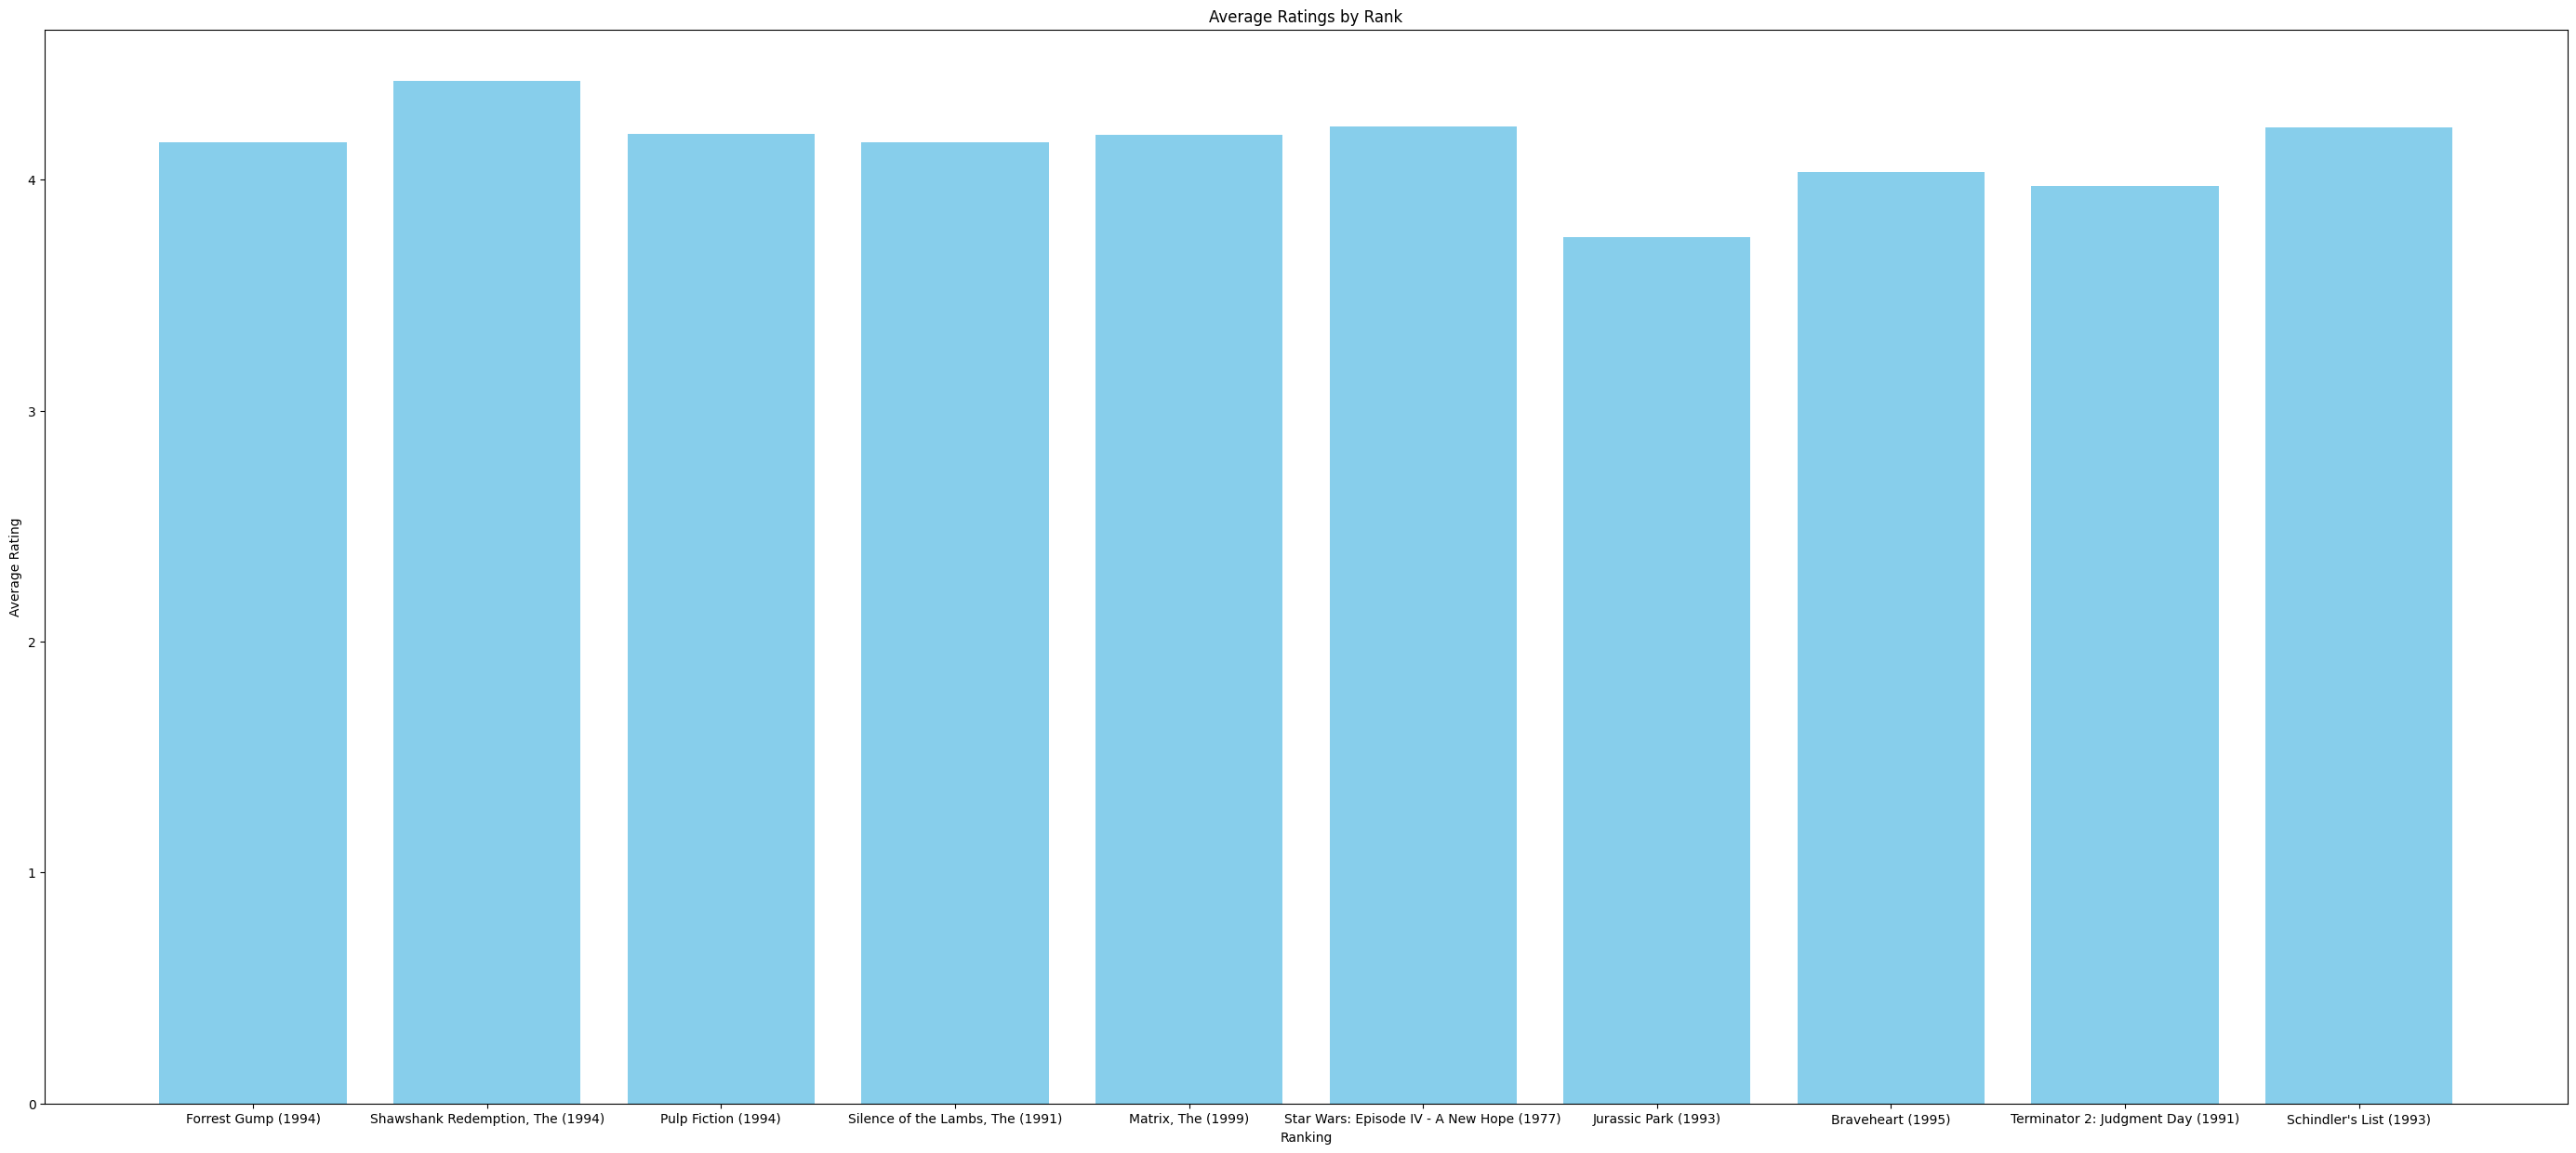

In [17]:
import matplotlib.pyplot as plt
# Used the dataframe from before

def plot_eda(): 
    
    plt.figure(figsize=(35, 15))  
    plt.bar(top_10_most_rated_avg["title"], top_10_most_rated_avg['average_rating'], color='skyblue', width=0.8)  
    plt.xlabel("Ranking")
    plt.ylabel("Average Rating")
    plt.title("Average Ratings by Rank")

    plt.show()

plot_eda()


In [18]:
movie_features_df=rating_popular_movie.pivot_table(index='title',columns='userId',values='rating').fillna(0)
movie_features_df.head()

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
title,,,,,,,,,,,,,,,,,,,,,
10 Things I Hate About You (1999),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,3.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0
12 Angry Men (1957),0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2001: A Space Odyssey (1968),0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,...,0.0,0.0,5.0,0.0,0.0,5.0,0.0,3.0,0.0,4.5
28 Days Later (2002),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.5,0.0,5.0
300 (2007),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,...,0.0,0.0,0.0,0.0,3.0,0.0,0.0,5.0,0.0,4.0


In [19]:
movie_features_df.shape


(450, 606)

# Creating Matrix 1.2


In [20]:
from pyexpat import model
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors
# a sparse matrix has many 0 values so we made our pivot that condenses and sumarises the ²data into a matrix
movie_features_df_metrix = csr_matrix(movie_features_df.values)
# Brute Force: This algorithm calculates distances between the query point and all other points in the dataset to find the k-nearest neighbors.
# It's straightforward but can be computationally expensive for large datasets.(chatgpt)
model_knn = NearestNeighbors(metric = 'cosine' , algorithm = 'brute')

model_knn.fit(movie_features_df_metrix)

NearestNeighbors(algorithm='brute', metric='cosine')

# Making the Model of the recommendation system 1.3

In [21]:
# Prompt the user to enter the name of a movie:
user_movie = input("Enter the name of a movie: ")
# there is a crash that happens when the code isn't right i believe its only for me though i'm not sure why( it fails basically even though i made it run with try/except)
# so you have to write the film's name right ( i'm not sure how to fix it otherwise then this)
# Find the index of the user-provided movie in the dataset:
try:
    query_index = movie_features_df.index.get_loc(user_movie)
except KeyError:
    print(f"Movie '{user_movie}' not found in the dataset. Please try another movie.")
    exit()

# Compute nearest neighbors for the user-provided movie (the cosine method):
distances, indices = model_knn.kneighbors(movie_features_df.iloc[query_index, :].values.reshape(1, -1), n_neighbors=6)


In [22]:
# Print recommendations:
for i in range(len(distances.flatten())):
    if i == 0:
        print(f"Recommendations for {user_movie}:\n")
    else:
        recommended_movie = movie_features_df.index[indices.flatten()[i]]
        print(f"{i}: {recommended_movie}, with distance of {distances.flatten()[i]}")


Recommendations for Toy Story (1995):

1: Toy Story 2 (1999), with distance of 0.427398681640625
2: Jurassic Park (1993), with distance of 0.4343631863594055
3: Independence Day (a.k.a. ID4) (1996), with distance of 0.435738205909729
4: Star Wars: Episode IV - A New Hope (1977), with distance of 0.4426117539405823
5: Forrest Gump (1994), with distance of 0.45290398597717285



- Step-by-Step Explanation of Your Code
Here is a step-by-step explanation of your code snippet without the code snippets:

- Step 1: Getting User Input
Objective: To get a movie name from the user.
Process: The code asks the user to enter a movie name and stores it in a variable.
- Step 2: Finding the Movie in the Dataset
- Objective: To find the position (index) of the entered movie in a dataset.
Process: The code checks if the entered movie name is in a DataFrame called movie_features_df.
Handling Errors: If the movie isn't found, a KeyError occurs, and the code displays a message indicating that the movie was not found. It then exits the program.
- Step 3: Computing Nearest Neighbors
Objective: To find the movies most similar to the one entered by the user.
Process: The code uses a K-Nearest Neighbors (KNN) model to compute the "distances" between the user's movie and others in the dataset. This provides a list of the closest matches.
Key Calculation: The code reshapes the features of the found movie into a one-dimensional array and calculates the distances to other movies.
- Step 4: Displaying Recommendations
Objective: To show the recommended movies based on similarity.
Process: The code iterates through the distances and indices to display the closest matches. The first iteration identifies the movie for which recommendations are being provided, while subsequent iterations list the recommended movies along with their computed distances.
Summary
- This code snippet:

Takes a movie name as input from the user.
Checks if that movie exists in a given dataset.
If it does, calculates which other movies are most similar to it using a K-Nearest Neighbors (KNN) model.
Displays a list of recommended movies based on the computed similarities.
The code can fail if the user-provided movie doesn't exist in the dataset, or if there is a case sensitivity or spelling issue. Improving error handling and feedback could help mitigate these issues.

# b) Look online and read more about recommender systems and briefly describe how they work. Don't forget to cite the source. (I summarized but i saw the information with my classmates)

Recommender systems are a type of information filtering system that suggests items to users based on various factors. These systems are commonly used in e-commerce, streaming services, social media, and other online platforms to enhance user experience by providing personalized recommendations.

How Recommender Systems Work
Recommender systems generally operate using three main approaches:

- Collaborative Filtering:
This approach relies on user behavior and preferences to make recommendations. There are two types:
User-based Collaborative Filtering: Recommends items that users with similar preferences have liked.
Item-based Collaborative Filtering: Recommends items similar to those the user has liked in the past.
Content-based Filtering:
This approach suggests items based on the features of those items. It uses item attributes, like genre or description in the case of movies, to recommend similar items based on what the user has liked before.
Hybrid Methods:
These systems combine collaborative and content-based approaches to leverage the strengths of each method. Hybrid systems might also include additional data sources, such as demographic information or contextual data, to improve recommendations.
Applications
Recommender systems are widely used in various domains:

- E-commerce: Suggesting products to buy based on past purchases or browsing history.
Streaming Services: Recommending movies, shows, or music based on user preferences.
Social Media: Suggesting friends, posts, or content to engage with.
Source
For more detailed information, you can refer to this article on Towards Data Science, which discusses various recommender system approaches and their applications . Additionally, "Recommender Systems Handbook" by Francesco Ricci et al. provides an in-depth look at recommender systems and their methodologies .